# Projeto Final
## Base de dados **Hotel Reservations**
- https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

#### Submissão: [Google-Forms](https://forms.gle/kKjVGvuboHb4LD4S9)
#### Prazo de envio: **09/12/2024**

## Exercício 1: Utilizando a função apply
Crie uma nova coluna chamada `stay_duration` a partir da soma de `no_of_weekend_nights` e `no_of_week_nights`.

In [2]:
import pandas as pd
df = pd.read_csv('Hotel-Reservations.csv')

df['stay_duration'] = df.apply(lambda x: x['no_of_weekend_nights'] + x['no_of_week_nights'], axis=1)
df[['no_of_week_nights','no_of_weekend_nights', 'stay_duration']].head(10)

,no_of_week_nights,no_of_weekend_nights,stay_duration
0,2,1,3
1,3,2,5
2,1,2,3
3,2,0,2
4,1,1,2
5,2,0,2
6,3,1,4
7,3,1,4
8,4,0,4
9,5,0,5


## Exercício 2: Utilizando a função transform
- Aplique a normalização (escalonamento entre 0 e 1) Min-Max na coluna `avg_price_per_room`.
- **Normalização Min-Max**:
$
x' = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$

### Onde:
- \( $x$ \): Valor original.
- \( $x'$ \): Valor normalizado (entre 0 e 1).
- \( $x_{\text{min}}$ \): Valor mínimo do conjunto de dados.
- \( $x_{\text{max}}$ \): Valor máximo do conjunto de dados.



In [3]:
df = pd.read_csv('Hotel-Reservations.csv')

max = df['avg_price_per_room'].max()
min = df['avg_price_per_room'].min()

df['avg_price_per_room'] = df['avg_price_per_room'].transform(lambda x: (x - min) / (max - min))
df['avg_price_per_room']

0        0.120370
1        0.197556
2        0.111111
3        0.185185
4        0.175000
           ...   
36270    0.310741
36271    0.168426
36272    0.182204
36273    0.175000
36274    0.299389
Name: avg_price_per_room, Length: 36275, dtype: float64

## Exercício 3: Substituições com replace e regex
Altere a coluna `room_type_reserved` extraindo apenas os números da coluna.

In [4]:
df = pd.read_csv('Hotel-Reservations.csv')

df['room_type_reserved'] = df['room_type_reserved'].replace(regex=r'\D',value='')
df['room_type_reserved'].head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    4
8    1
9    4
Name: room_type_reserved, dtype: object

## Exercício 4: Gráfico Mapa de Calor
Faça a plotagem do Mapa de calor (**Heatmap**) entre as colunas numéricas

In [5]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


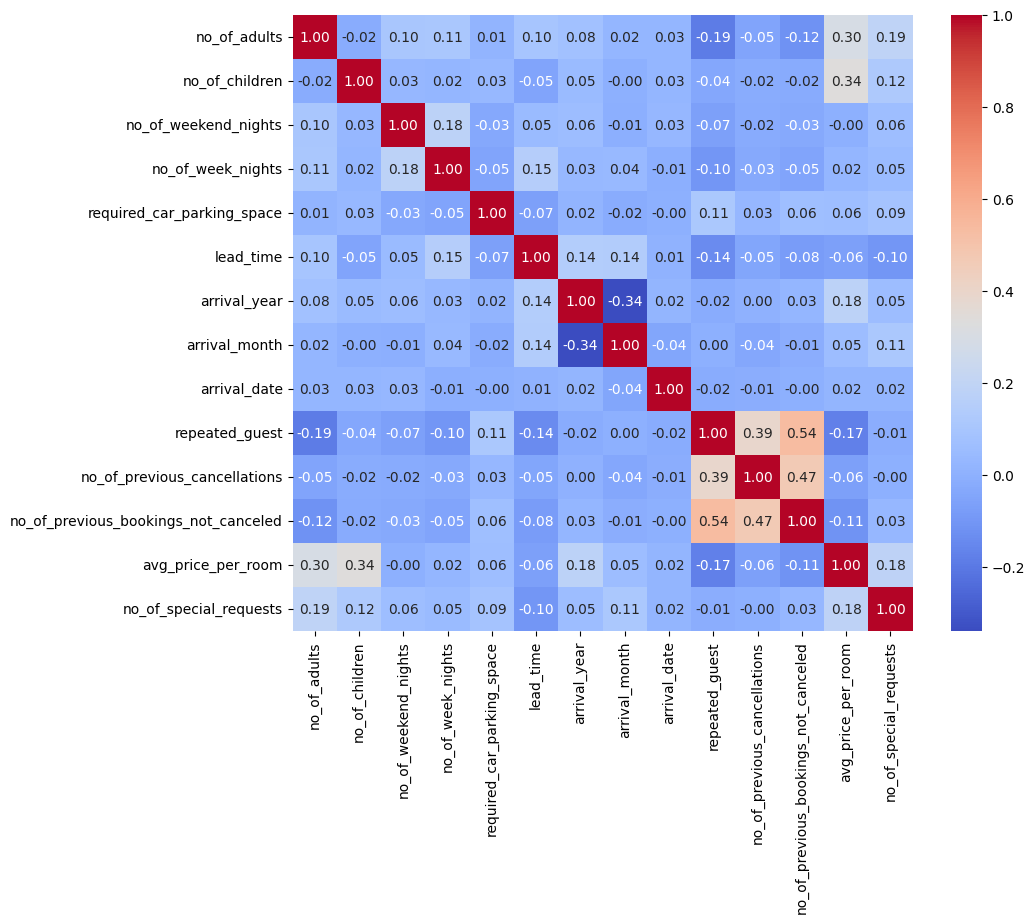

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Hotel-Reservations.csv')
df_num = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(df_num, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


## Exercício 5: Expressões Regulares
Altere a coluna `Booking_ID`, extraindo apenas os números da coluna.

In [41]:
df = pd.read_csv('Hotel-Reservations.csv')
df['Booking_ID'] = df['Booking_ID'].replace(regex=r'\D',value='').astype(int)

df


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,3,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,4,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,5,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## Exercício 6: Gráfico de Dispersão
Faça a plotagem com a relação entre `lead_time` e `avg_price_per_room` (sem a normalização).

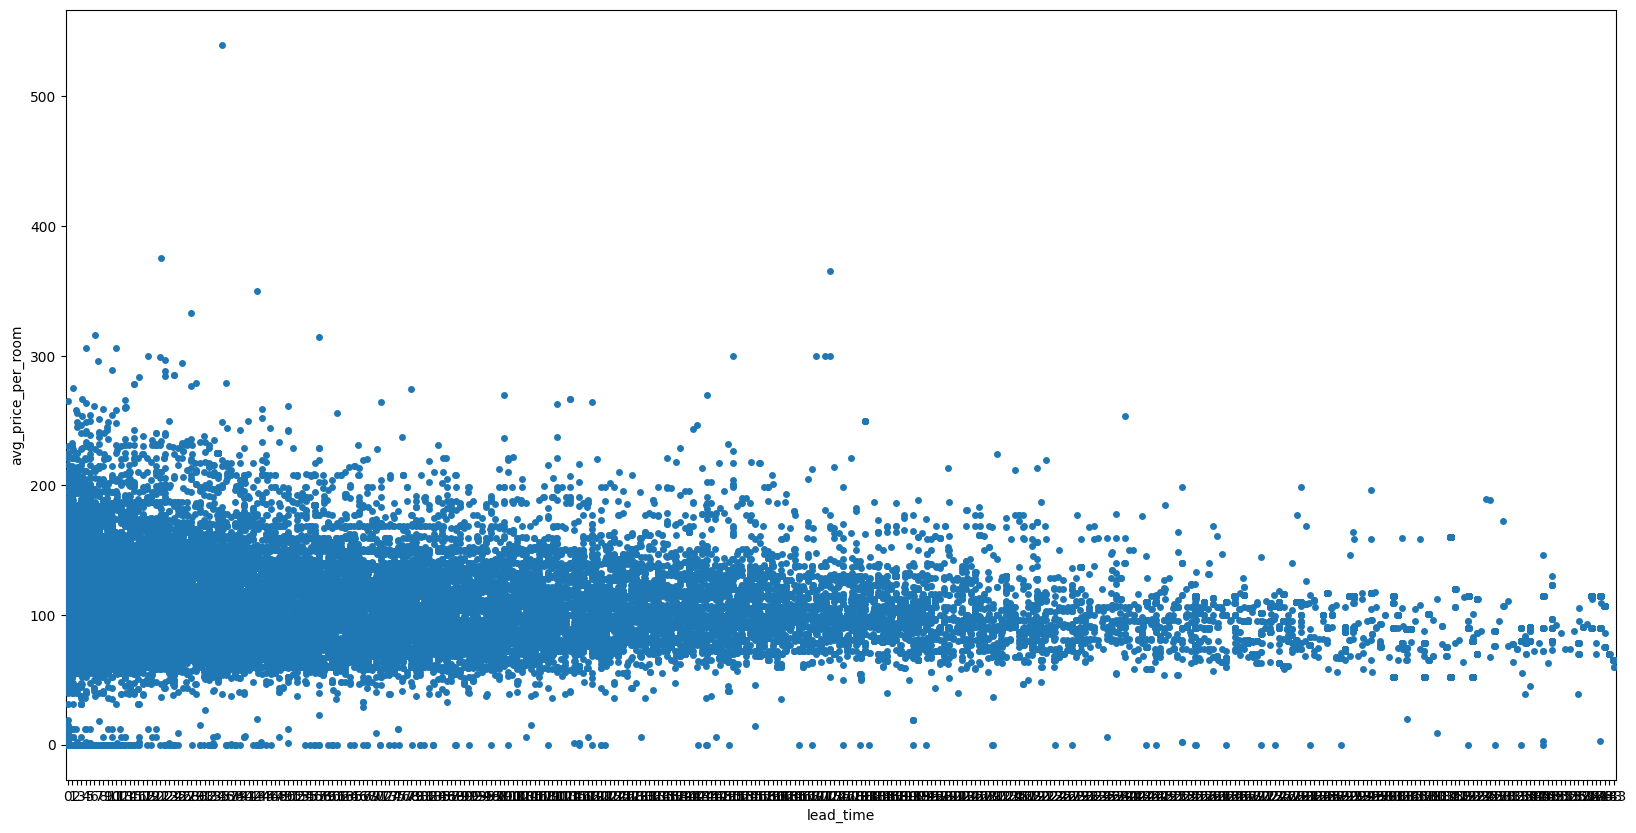

In [52]:
df = pd.read_csv('Hotel-Reservations.csv')

plt.figure(figsize=(20,10))
a = sns.stripplot(data = df, x='lead_time', y='avg_price_per_room')
plt.show()

## Exercício 7: Groupby e Agg
Calcule o preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

In [57]:
df = pd.read_csv('Hotel-Reservations.csv')

preco_medio = df.groupby('room_type_reserved')['avg_price_per_room'].mean()
preco_medio

room_type_reserved
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 6    182.212836
Room_Type 7    155.198291
Name: avg_price_per_room, dtype: float64

## Exercício 8: Boxplot
Apresente o boxplot com os dados de preço médio (`avg_price_per_room`), sem normalização, por tipo de quarto (`room_type_reserved`).

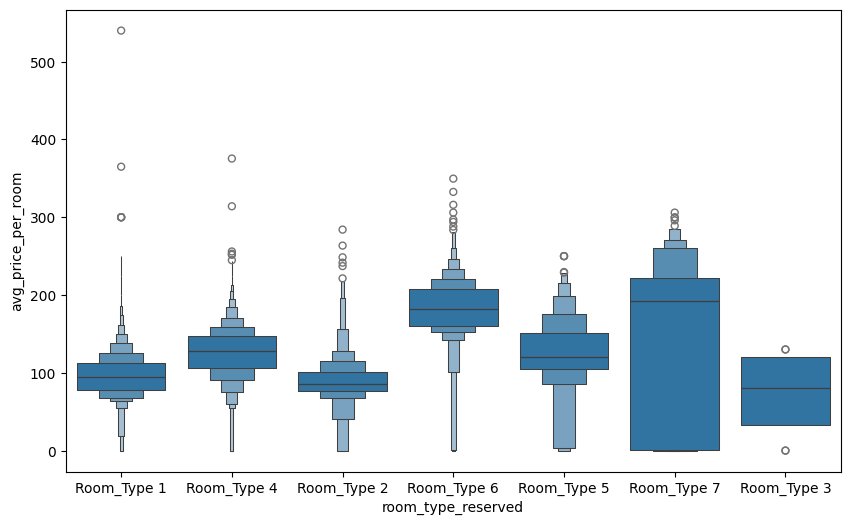

In [64]:
plt.figure(figsize=(10,6))
sns.boxenplot(data=df, y='avg_price_per_room', x='room_type_reserved')
plt.show()